The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [ ]:
# general libraties that exist on most systems

import os
import importlib
import sys
import time
import shutil
from IPython.display import clear_output

In [ ]:
# The libraries that we will need in this notebook.
# If the required library doesn't exist, we install it via pip

required_packages   = {'numpy','xarray','ipympl','pymatgen','pybaselines','h5netcdf'}

for rp in required_packages:
    try:
        print('Checking %s package'%rp)
        globals()[rp] = importlib.import_module(rp)
    except:
        print('Installing %s'%rp)
        !! pip install $rp
        globals()[rp] = importlib.import_module(rp)
        if rp == 'pymatgen':
            !reset -f


import numpy as np
import xarray as xr

In [ ]:
# Here we check if this notebook is running on Google Colab.
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [ ]:
# If the notebbok is running on Google Colab, we mount google drive to instance
# and enable enable_custom_widget_manager for ipympl package to work properly.
# See See: https://matplotlib.org/ipympl/ for ipympl

if IN_COLAB:
    # mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    # Enable enable_custom_widget_manager
    from google.colab import output
    output.enable_custom_widget_manager()

In [ ]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

# Setting up the example data path

# mxrd class

In [ ]:
%run -i mxrd.py

In [ ]:
phases = [
        {"mp_id":'none', "cif":'_cifs/LaB6.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/CeO2.cif', "label":"CeO2", "scale":0.99, "scale_a":1, "scale_b":1, "scale_c":1},
        # {"mp_id":'none', "cif":'_cifs/Zr.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

In [ ]:
sample_Kapton = exrd()
# sample_Kapton.read_nc('integrated/Kapton.nc',plot=False)
sample_Kapton.read_data(nc_file='integrated/Kapton.nc',plot=False)
sample_Air = exrd()
sample_Air.read_data(nc_file='integrated/Air_scattering.nc',plot=False)


# sample_mix = exrd()
# sample_mix.read_nc('integrated/NIST-LaB6-CeO2-mix.nc',plot=False)
# sample_mix.get_baseline( i1d_bkg=sample_Kapton.ds.i1d,arpls_lam=1e5)


# sample_LaB6 = exrd()
# sample_LaB6.read_nc('integrated/NIST-LaB6-CeO2-mix.nc',plot=False)
# sample_LaB6.get_baseline( i1d_bkg=None,arpls_lam=1e5)


sample_LaB6 = exrd()
sample_LaB6.read_data(nc_file='integrated/NIST-LaB6-CeO2-mix.nc',plot=False)
sample_LaB6.get_baseline( i1d_bkg=sample_Air.ds.i1d,use_arpls=False)



In [ ]:
phases = [
        {"mp_id":'none', "cif":'_cifs/LaB6.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        # {"mp_id":'none', "cif":'_cifs/CeO2.cif', "label":"CeO2", "scale":0.99, "scale_a":1, "scale_b":1, "scale_c":1},
        # {"mp_id":'none', "cif":'_cifs/Zr.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

# phases = [
#         {"mp_id":'none', "cif":'_cifs/LaB6.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
#         # {"mp_id":'mp-20194', "cif":'none', "label":"CeO2", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
#         {"mp_id":'none', "cif":'_cifs/Zr.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
#         ]

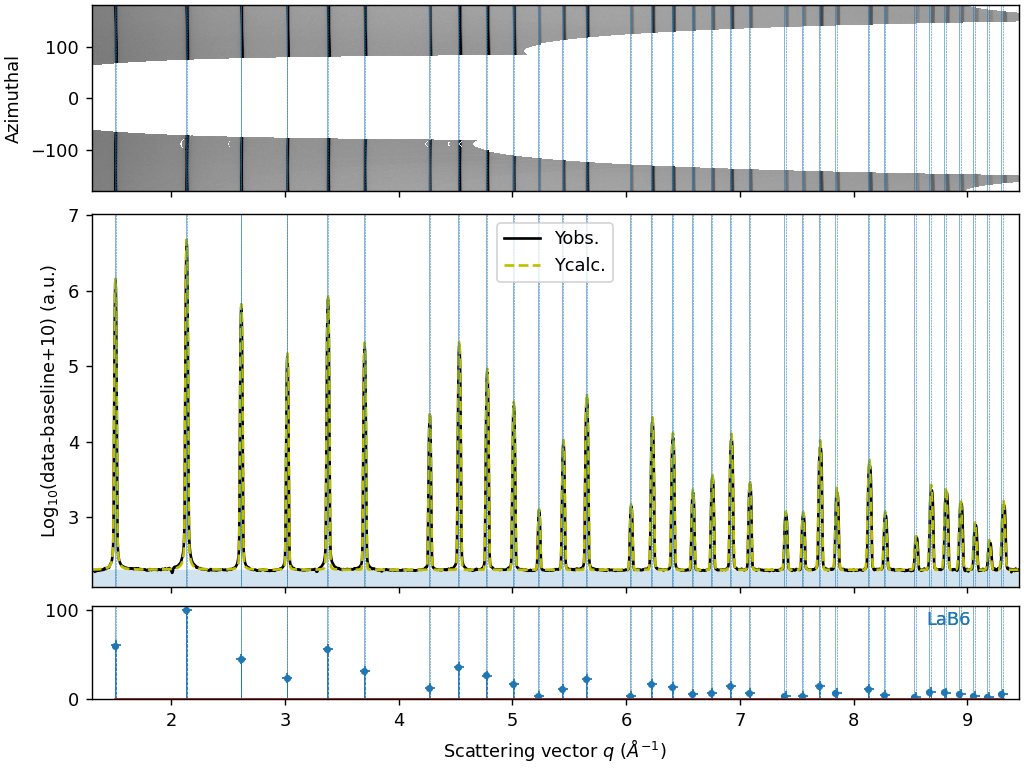


Rwp from 1st refinement is = 10.875 
 

Background is refined. Rwp is now 10.263 (was 10.875)

Cell parameters of all phases are refined. Rwp is now 6.995 (was 10.263)

Instrument parameters ['U', 'V', 'W', 'X', 'Y', 'Z', 'Zero', 'SH/L'] are refined. Rwp is now 5.111 (was 6.995)


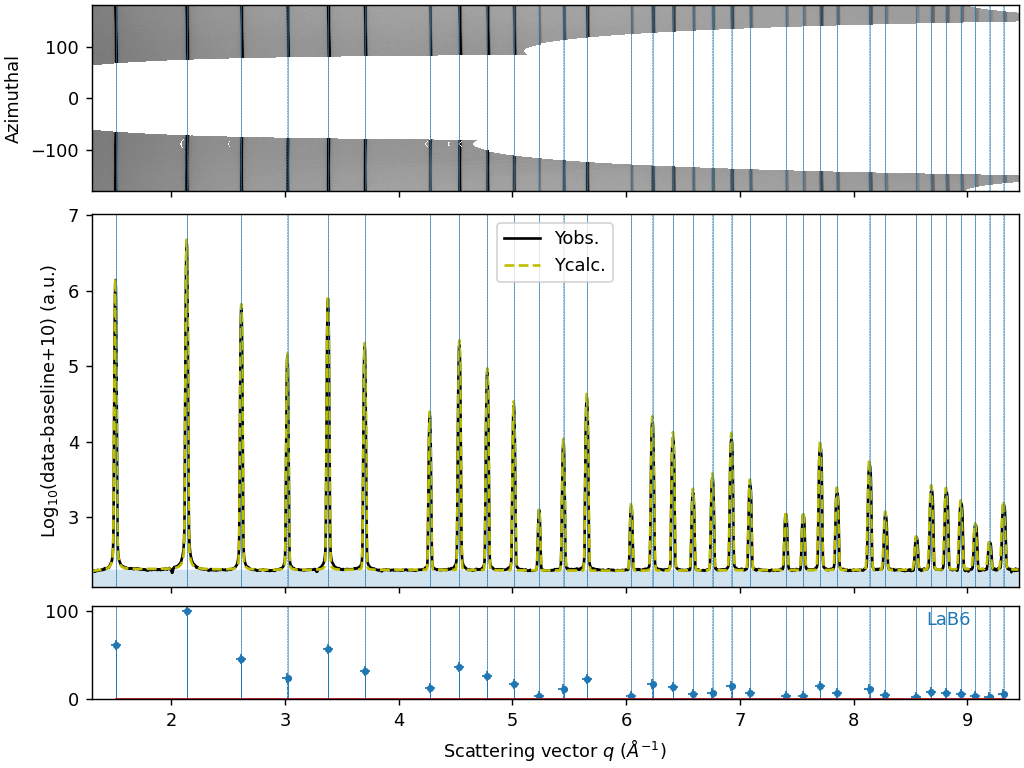

In [45]:

%run -i mxrd.py



plt.close('all')

sample = exrd(verbose=False)
sample.read_data(nc_file='integrated/NIST-LaB6.nc',plot=False,radial_range=(1.3,9.45))
sample.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,arpls_lam=1e7,plot=False,use_arpls=True)
sample.load_phases(phases=[{"mp_id":'none', "cif":'_cifs/LaB6.cif', "label":"LaB6", "scale":1.0, "scale_a":1, "scale_b":1, "scale_c":1},],
                       plot=False)
sample.setup_gsas2_calculator(gsasii_lib_directory='/home/mt/G2/GSAS-II/GSASII',
                                  gsasii_scratch_directory=None,                     
                                  )



sample.set_LeBail()
sample.refine_background()
sample.refine_cell_params()
# sample.refine_strain_broadening()
# sample.refine_size_broadening()
sample.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W',   'X', 'Y', 'Z', 'Zero', 'SH/L'])

sample.gpx_plotter()

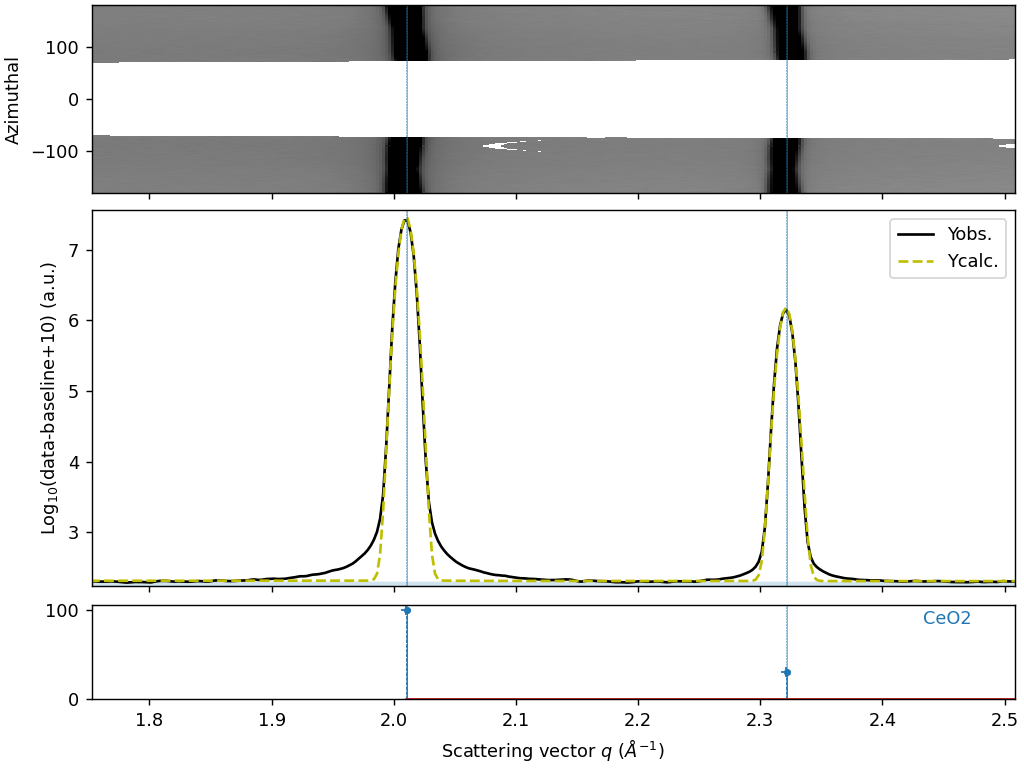


Rwp from 1st refinement is = 12.848 
 

Background is refined. Rwp is now 10.778 (was 12.848)

Cell parameters of all phases are refined. Rwp is now 8.860 (was 10.778)

Strain broadening of all phases are refined. Rwp is now 8.696 (was 8.860)

Size broadening of all phases are refined. Rwp is now 8.690 (was 8.696)

Instrument parameters ['U', 'V', 'W'] are refined. Rwp is now 8.009 (was 8.690)


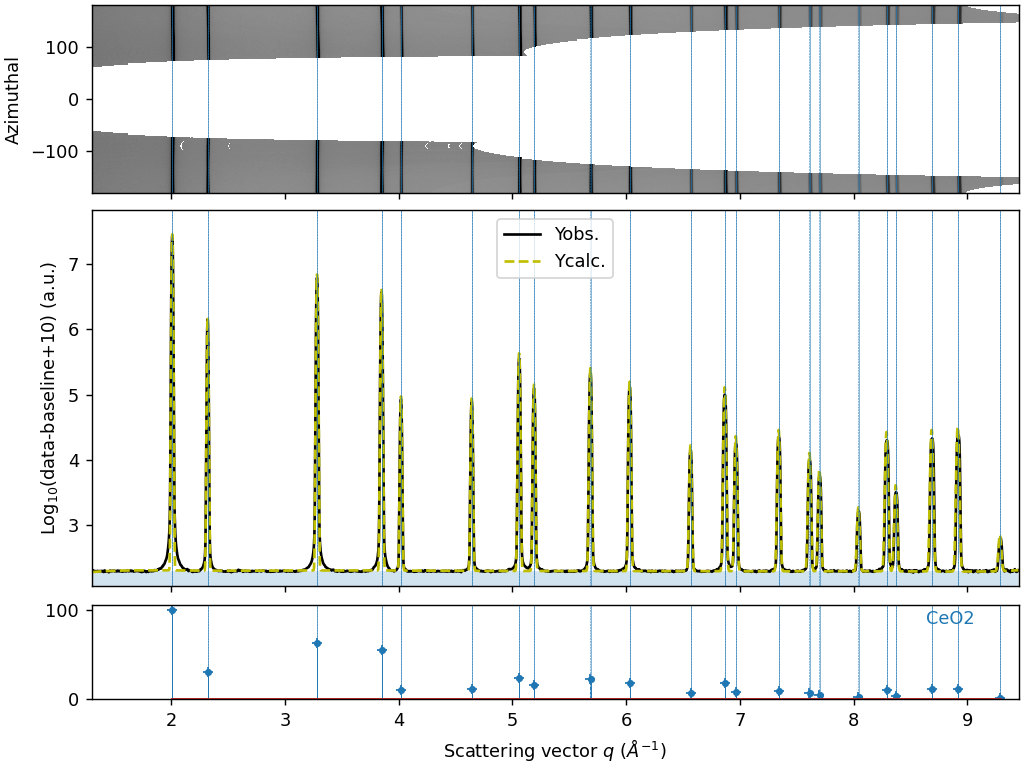

In [47]:
%run -i mxrd.py



plt.close('all')

sample = exrd(verbose=False)
sample.read_data(nc_file='integrated/NIST-CeO2.nc',plot=False,radial_range=(1.3,9.45))
sample.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,arpls_lam=1e5,plot=False,use_arpls=True)
sample.load_phases(phases=[{"mp_id":'none', "cif":'_cifs/CeO2.cif', "label":"CeO2", "scale":0.990, "scale_a":1, "scale_b":1, "scale_c":1},],
                       plot=False)


sample.setup_gsas2_calculator(gsasii_lib_directory='/home/mt/G2/GSAS-II/GSASII',
                                  gsasii_scratch_directory=None,                     
                                  )
sample.set_LeBail()
sample.refine_background()
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W'])

sample.gpx_plotter()

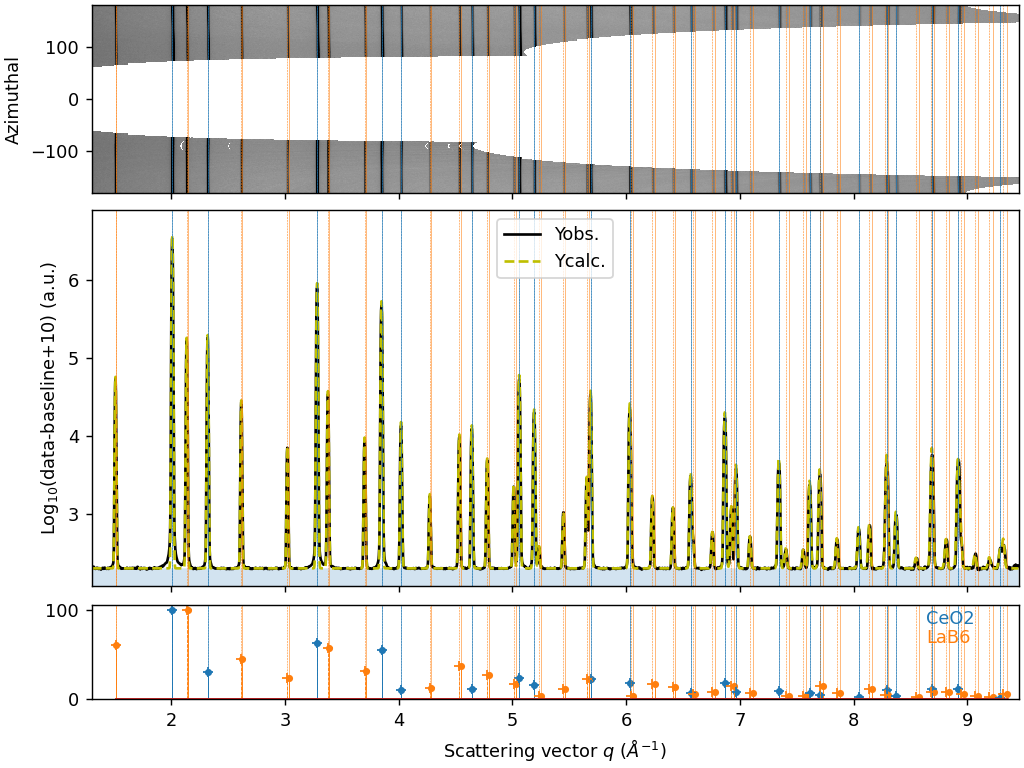


Rwp from 1st refinement is = 28.748 
 
CPU times: user 2.67 s, sys: 8 ms, total: 2.68 s
Wall time: 2.94 s
CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 7.17 ms

Background is refined. Rwp is now 28.748 (was 28.748)
CPU times: user 2.8 s, sys: 2.98 ms, total: 2.8 s
Wall time: 2.81 s

Cell parameters of LaB6 phase is refined. Rwp is now 10.371 (was 28.748)
CPU times: user 11.5 s, sys: 1.95 ms, total: 11.5 s
Wall time: 11.5 s

Strain broadening of all phases are refined. Rwp is now 9.730 (was 10.371)
CPU times: user 8.02 s, sys: 1.97 ms, total: 8.03 s
Wall time: 8.03 s

Size broadening of all phases are refined. Rwp is now 9.785 (was 9.730)
CPU times: user 3.65 s, sys: 992 μs, total: 3.66 s
Wall time: 3.66 s

Instrument parameters ['U', 'V', 'W'] are refined. Rwp is now 5.845 (was 9.785)
CPU times: user 7.7 s, sys: 1.96 ms, total: 7.7 s
Wall time: 7.71 s
CPU times: user 428 ms, sys: 6 ms, total: 434 ms
Wall time: 431 ms


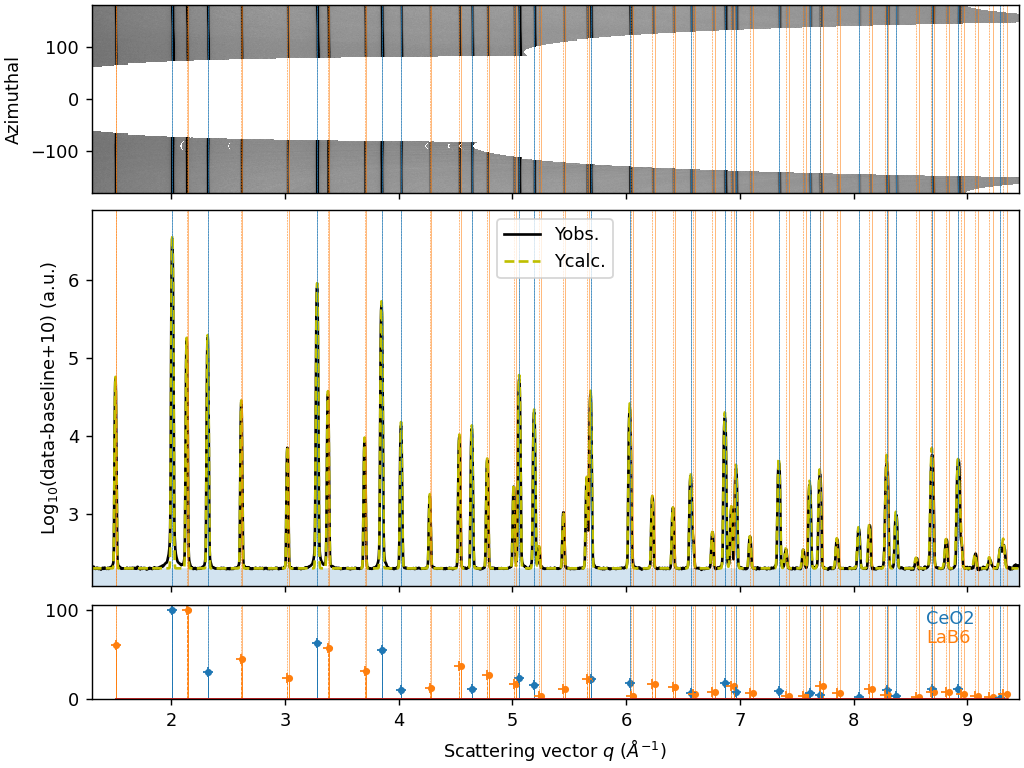

In [55]:
%run -i mxrd.py



plt.close('all')

sample = exrd(verbose=False)
sample.read_data(nc_file='integrated/NIST-LaB6-CeO2-mix.nc',plot=False,radial_range=(1.3,9.45))
sample.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,arpls_lam=1e5,plot=False,use_arpls=True)
sample.load_phases(phases=[{"mp_id":'none', "cif":'_cifs/CeO2.cif', "label":"CeO2", "scale":0.990, "scale_a":1, "scale_b":1, "scale_c":1},
                           {"mp_id":'none', "cif":'_cifs/LaB6.cif', "label":"LaB6", "scale":0.997, "scale_a":1, "scale_b":1, "scale_c":1},],
                       plot=False)


%time sample.setup_gsas2_calculator(gsasii_lib_directory='/home/mt/G2/GSAS-II/GSASII')
%time sample.set_LeBail()
%time sample.refine_background()
%time sample.refine_cell_params(phase_ind=1)
%time sample.refine_strain_broadening()
%time sample.refine_size_broadening()
%time sample.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W'])

%time sample.gpx_plotter()